In [1]:
from util import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mob1 = '../data/01-10-2023/DATA_LABEL'

In [4]:
mob1 = pd.read_parquet(mob1)
mob1

,AREA,PROFESSION,GEN_GRP,LIFE_STG,AGE,LOR,CREDIT_SCORE,CASA_BAL_SUM_36M,CASA_TXN_AMT_SUM_36M,CASA_BAL_SUM_LATEST,LOAN_SUM_LATEST,REACTIVATED_CASA
CUSTOMER_CDE,,,,,,,,,,,,
17085001,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,24.0,422.0,NaN,NaN,NaN,NaN,NaN,0
17207565,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,19.0,390.0,NaN,NaN,NaN,NaN,NaN,0
17471422,VN0010007,"Giao duc, dao tao",Gen Z,Bắt đầu sự nghiệp,18.0,328.0,NaN,NaN,NaN,NaN,NaN,0
17553800,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen X,Thiết lập tài sản,43.0,302.0,NaN,NaN,NaN,NaN,NaN,0
17738041,VN0010001,"Kinh doanh tai san, dich vu tu van",Gen Z,Bắt đầu sự nghiệp,20.0,236.0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6629016,VN0010002,"HDong Dang, Doan The va Hiep Hoi",Gen Y,Lập gia đình,29.0,3067.0,NaN,83581.0,NaN,1577.0,NaN,0
5696193,VN0010005,"Kinh doanh tai san, dich vu tu van",Gen X,Thiết lập tài sản,43.0,3201.0,NaN,1558395.0,NaN,1665.0,NaN,0
8220525,VN0010006,"HDong Dang, Doan The va Hiep Hoi",Gen X,Bảo vệ tài sản,46.0,2758.0,NaN,90418.0,NaN,1706.0,NaN,0


In [5]:
mob1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056504 entries, 17085001 to 8252688
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   AREA                  1056504 non-null  object 
 1   PROFESSION            1056504 non-null  object 
 2   GEN_GRP               1056504 non-null  object 
 3   LIFE_STG              1052867 non-null  object 
 4   AGE                   1056504 non-null  float64
 5   LOR                   1056504 non-null  float64
 6   CREDIT_SCORE          10096 non-null    float64
 7   CASA_BAL_SUM_36M      420462 non-null   float64
 8   CASA_TXN_AMT_SUM_36M  85782 non-null    float64
 9   CASA_BAL_SUM_LATEST   410651 non-null   float64
 10  LOAN_SUM_LATEST       531 non-null      float64
 11  REACTIVATED_CASA      1056504 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 104.8+ MB


In [6]:
mob1.columns

Index(['AREA', 'PROFESSION', 'GEN_GRP', 'LIFE_STG', 'AGE', 'LOR',
       'CREDIT_SCORE', 'CASA_BAL_SUM_36M', 'CASA_TXN_AMT_SUM_36M',
       'CASA_BAL_SUM_LATEST', 'LOAN_SUM_LATEST', 'REACTIVATED_CASA'],
      dtype='object')

In [7]:
for c in mob1.columns:
    if mob1[c].dtype == object:
        print(c, mob1[c].nunique())

AREA 8
PROFESSION 17
GEN_GRP 5
LIFE_STG 6


# IV and WoE

Guide line for IV:

- IV < 0.02: not useful for prediction-
- 0.02 - 0.1: weak relationship between indept and dependent
- 0.1 - 0.3: medium
- 0.3 - 0.5: strong
- IV > 0.5: suspicious predictive

In [8]:
def iv_woe(df, target, bins=10):
    def iv_power(x):
        if x < 0.02:
            return '0. no-use'
        elif x <= 0.1:
            return '1. weak'
        elif x <= 0.3:
            return '2. medium'
        elif x <= 0.5:
            return '3. strong'
        elif x > 0.5:
            return '4. suspicious'

    iv_df, woe_df = pd.DataFrame(), pd.DataFrame()
    cols = df.columns.tolist()
    cols.remove(target)
    for c in cols:
        if (df[c].dtype.kind in 'bifc') and (df[c].nunique() > 10):
            binned_x = pd.qcut(df[c], bins, duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': df[target]})
        else:
            d0 = pd.DataFrame({'x': df[c], 'y': df[target]})
        d = d0.groupby('x',as_index=False).agg({'y': ['count', 'sum']})
        d.columns = ['cutoff', 'n', 'num_event']
        d['perc_event'] = np.maximum(d['num_event'], 0.5) / d['num_event'].sum()
        d['num_non_event'] = d['n'] - d['num_event']
        d['perc_non_event'] = np.maximum(d['num_non_event'], 0.5) / d['num_non_event'].sum()
        d['woe'] = np.log(d['perc_non_event']/d['perc_event'])
        d['iv'] = d['woe'] * (d['perc_non_event'] - d['perc_event'])
        # print(f'{c}, {d["iv"].sum()}')
        d.insert(loc=0, column='variable', value=c)
        tmp = pd.DataFrame({'variable': [c], 'iv': [d['iv'].sum()]}, columns=['variable', 'iv'])
        iv_df = pd.concat([iv_df, tmp], axis=0)
        woe_df = pd.concat([woe_df, d], axis=0)
    iv_df['iv_power'] = iv_df['iv'].apply(lambda x: iv_power(x))
    return iv_df, woe_df

In [9]:
iv_df, woe_df = iv_woe(mob1, 'REACTIVATED_CASA')

In [10]:
iv_df.sort_values(by='iv')

,variable,iv,iv_power
0,LIFE_STG,0.014409,0. no-use
0,CASA_BAL_SUM_LATEST,0.020058,1. weak
0,GEN_GRP,0.020103,1. weak
0,AGE,0.034578,1. weak
0,CASA_BAL_SUM_36M,0.039646,1. weak
0,CASA_TXN_AMT_SUM_36M,0.077661,1. weak
0,PROFESSION,0.149582,2. medium
0,CREDIT_SCORE,0.234526,2. medium
0,AREA,0.290646,2. medium
0,LOAN_SUM_LATEST,0.334981,3. strong


In [11]:
woe_df

,variable,cutoff,n,num_event,perc_event,num_non_event,perc_non_event,woe,iv
0,AREA,VN0010001,293082,7282,0.243798,285800,0.278385,0.132666,0.004589
1,AREA,VN0010002,73473,2092,0.070039,71381,0.069529,-0.007309,0.000004
2,AREA,VN0010003,88954,2800,0.093743,86154,0.083919,-0.110704,0.001088
3,AREA,VN0010004,60568,1011,0.033848,59557,0.058012,0.538773,0.013019
4,AREA,VN0010005,117638,8058,0.269778,109580,0.106737,-0.927231,0.151177
...,...,...,...,...,...,...,...,...,...
1,LOAN_SUM_LATEST,"(12497000.0, 43750000.0]",53,1,0.071429,52,0.100580,0.342258,0.009977
2,LOAN_SUM_LATEST,"(43750000.0, 99400000.0]",53,0,0.035714,53,0.102515,1.054454,0.070438
3,LOAN_SUM_LATEST,"(99400000.0, 228000000.0]",53,3,0.214286,50,0.096712,-0.795575,0.093539
4,LOAN_SUM_LATEST,"(228000000.0, 620000000.0]",53,3,0.214286,50,0.096712,-0.795575,0.093539


In [12]:
woe_df[woe_df['variable']=='AREA']

,variable,cutoff,n,num_event,perc_event,num_non_event,perc_non_event,woe,iv
0,AREA,VN0010001,293082,7282,0.243798,285800,0.278385,0.132666,0.004589
1,AREA,VN0010002,73473,2092,0.070039,71381,0.069529,-0.007309,0.000004
2,AREA,VN0010003,88954,2800,0.093743,86154,0.083919,-0.110704,0.001088
3,AREA,VN0010004,60568,1011,0.033848,59557,0.058012,0.538773,0.013019
4,AREA,VN0010005,117638,8058,0.269778,109580,0.106737,-0.927231,0.151177
5,AREA,VN0010006,168201,5463,0.182899,162738,0.158516,-0.143077,0.003489
6,AREA,VN0010007,194693,2331,0.078041,192362,0.187371,0.875861,0.095758
7,AREA,VN0010008,59895,832,0.027855,59063,0.057531,0.725307,0.021524


In [13]:
woe_df[woe_df['variable']=='PROFESSION']

,variable,cutoff,n,num_event,perc_event,num_non_event,perc_non_event,woe,iv
0,PROFESSION,"Cong nghiep che bien, san xuat",43726,1166,0.039037,42560,0.041456,0.060115,0.000145
1,PROFESSION,Cong nghiep khai thac,1109,22,0.000737,1087,0.001059,0.362914,0.000117
2,PROFESSION,"Giao duc, dao tao",31011,505,0.016907,30506,0.029715,0.563900,0.007222
3,PROFESSION,"HDong Dang, Doan The va Hiep Hoi",463945,12172,0.407513,451773,0.440052,0.076821,0.002500
4,PROFESSION,"Khoa hoc, cong nghe",159,1,0.000033,158,0.000154,1.525374,0.000184
5,PROFESSION,"Kinh doanh tai san, dich vu tu van",221880,10383,0.347618,211497,0.206010,-0.523180,0.074086
6,PROFESSION,"Nong, lam nghiep",40700,587,0.019652,40113,0.039072,0.687210,0.013346
7,PROFESSION,"Qly nha nuoc, an ninh, quoc phong",3234,14,0.000469,3220,0.003136,1.900859,0.005071
8,PROFESSION,"Sx va pphoi dien, khi dot va nuoc",1168,5,0.000167,1163,0.001133,1.912100,0.001846
9,PROFESSION,"Tai chinh, tin dung",2883,16,0.000536,2867,0.002793,1.651212,0.003727


In [14]:
valid_cols = iv_df[iv_df['iv']>0.02]['variable'].tolist()
valid_cols

['AREA',
 'PROFESSION',
 'GEN_GRP',
 'AGE',
 'LOR',
 'CREDIT_SCORE',
 'CASA_BAL_SUM_36M',
 'CASA_TXN_AMT_SUM_36M',
 'CASA_BAL_SUM_LATEST',
 'LOAN_SUM_LATEST']

In [15]:
valid_mob1 = mob1[valid_cols]
valid_mob1

,AREA,PROFESSION,GEN_GRP,AGE,LOR,CREDIT_SCORE,CASA_BAL_SUM_36M,CASA_TXN_AMT_SUM_36M,CASA_BAL_SUM_LATEST,LOAN_SUM_LATEST
CUSTOMER_CDE,,,,,,,,,,
17085001,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,24.0,422.0,NaN,NaN,NaN,NaN,NaN
17207565,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,19.0,390.0,NaN,NaN,NaN,NaN,NaN
17471422,VN0010007,"Giao duc, dao tao",Gen Z,18.0,328.0,NaN,NaN,NaN,NaN,NaN
17553800,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen X,43.0,302.0,NaN,NaN,NaN,NaN,NaN
17738041,VN0010001,"Kinh doanh tai san, dich vu tu van",Gen Z,20.0,236.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6629016,VN0010002,"HDong Dang, Doan The va Hiep Hoi",Gen Y,29.0,3067.0,NaN,83581.0,NaN,1577.0,NaN
5696193,VN0010005,"Kinh doanh tai san, dich vu tu van",Gen X,43.0,3201.0,NaN,1558395.0,NaN,1665.0,NaN
8220525,VN0010006,"HDong Dang, Doan The va Hiep Hoi",Gen X,46.0,2758.0,NaN,90418.0,NaN,1706.0,NaN


In [16]:
# Get dummy variable for category cols
cat_dummy = [pd.get_dummies(mob1[c], prefix=c, prefix_sep=':') for c in valid_mob1.select_dtypes(object).columns]
cat_dummy = pd.concat(cat_dummy, axis=1)
cat_dummy

,AREA:VN0010001,AREA:VN0010002,AREA:VN0010003,AREA:VN0010004,AREA:VN0010005,AREA:VN0010006,AREA:VN0010007,AREA:VN0010008,"PROFESSION:Cong nghiep che bien, san xuat",PROFESSION:Cong nghiep khai thac,...,PROFESSION:Unknown,"PROFESSION:Van hoa, the thao","PROFESSION:Van tai kho bai, thong tin lien lac",PROFESSION:Xay dung,"PROFESSION:Y te, cuu tro xa hoi",GEN_GRP:Gen A,GEN_GRP:Gen X,GEN_GRP:Gen Y,GEN_GRP:Gen Z,GEN_GRP:Trước Gen X
CUSTOMER_CDE,,,,,,,,,,,,,,,,,,,,,
17085001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17207565,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17471422,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17553800,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17738041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6629016,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5696193,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8220525,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
preprocess_data = pd.concat([valid_mob1, cat_dummy], axis=1)
preprocess_data

,AREA,PROFESSION,GEN_GRP,AGE,LOR,CREDIT_SCORE,CASA_BAL_SUM_36M,CASA_TXN_AMT_SUM_36M,CASA_BAL_SUM_LATEST,LOAN_SUM_LATEST,...,PROFESSION:Unknown,"PROFESSION:Van hoa, the thao","PROFESSION:Van tai kho bai, thong tin lien lac",PROFESSION:Xay dung,"PROFESSION:Y te, cuu tro xa hoi",GEN_GRP:Gen A,GEN_GRP:Gen X,GEN_GRP:Gen Y,GEN_GRP:Gen Z,GEN_GRP:Trước Gen X
CUSTOMER_CDE,,,,,,,,,,,,,,,,,,,,,
17085001,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,24.0,422.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
17207565,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,19.0,390.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
17471422,VN0010007,"Giao duc, dao tao",Gen Z,18.0,328.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
17553800,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen X,43.0,302.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
17738041,VN0010001,"Kinh doanh tai san, dich vu tu van",Gen Z,20.0,236.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6629016,VN0010002,"HDong Dang, Doan The va Hiep Hoi",Gen Y,29.0,3067.0,NaN,83581.0,NaN,1577.0,NaN,...,0,0,0,0,0,0,0,1,0,0
5696193,VN0010005,"Kinh doanh tai san, dich vu tu van",Gen X,43.0,3201.0,NaN,1558395.0,NaN,1665.0,NaN,...,0,0,0,0,0,0,1,0,0,0
8220525,VN0010006,"HDong Dang, Doan The va Hiep Hoi",Gen X,46.0,2758.0,NaN,90418.0,NaN,1706.0,NaN,...,0,0,0,0,0,0,1,0,0,0


Guideline for WoE cat:

Event and non-event is reactive and no-reactive

- WoE > 0: distribution of no-reactive > distribution of reactive

- WoE < 0: distribution of no-reactive < distribution of reactive

In [18]:
def woe_cat(df, cat_feat, event_df):
    label = event_df.name
    df = pd.concat([df[cat_feat], event_df], axis=1)
    df = pd.concat([
        df.groupby(cat_feat, as_index=False)[label].count(), 
        df.groupby(cat_feat, as_index=False)[label].mean()
        ], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_event']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_event'] = df['prop_event'] * df['n_obs'] + 0.5
    df['n_non_event'] = (1 - df['prop_event']) * df['n_obs'] + 0.5
    df['prop_n_event'] = df['n_event'] / df['n_event'].sum()
    df['prop_n_non_event'] = df['n_non_event'] / df['n_non_event'].sum()
    df['woe'] = np.log(df['prop_n_non_event'] / df['prop_n_event'])
    df = df.sort_values(['woe'])
    df = df.reset_index(drop=True)
    df['diff_prop_event'] = df['prop_event'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    df['iv'] = (df['prop_n_non_event'] - df['prop_n_event']) * df['woe']
    df['iv'] = df['iv'].sum()
    return df

In [19]:
def plot_by_woe(df_woe, figsize=(5,5)):
    display(df_woe)
    x = np.array(df_woe.iloc[:,0].apply(str))
    y = df_woe['woe']
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x, y, marker='o', linestyle='dashed')
    ax.axhline(0, linestyle='--', color='black')
    ax.fill_between(x,0,max(y), facecolor='red', alpha=0.3)
    ax.fill_between(x,0,min(y), facecolor='green', alpha=0.3)
    plt.xticks(rotation=60)
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('WoE')
    plt.grid()
    plt.show()

In [20]:
y = mob1['REACTIVATED_CASA']
X = preprocess_data

In [21]:
X.select_dtypes(object).columns

Index(['AREA', 'PROFESSION', 'GEN_GRP'], dtype='object')

,AREA,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,VN0010005,117638,0.068498,0.111346,8058.5,109580.5,0.269759,0.106737,-0.927159,NaN,NaN,0.290567
1,VN0010006,168201,0.032479,0.159205,5463.5,162738.5,0.182891,0.158516,-0.143036,0.036019,0.784123,0.290567
2,VN0010003,88954,0.031477,0.084197,2800.5,86154.5,0.093747,0.083919,-0.110746,0.001002,0.032289,0.290567
3,VN0010002,73473,0.028473,0.069544,2092.5,71381.5,0.070047,0.069529,-0.007411,0.003004,0.103335,0.290567
4,VN0010001,293082,0.024846,0.277407,7282.5,285800.5,0.243782,0.278385,0.132729,0.003627,0.140141,0.290567
5,VN0010004,60568,0.016692,0.057329,1011.5,59557.5,0.033860,0.058012,0.538417,0.008154,0.405688,0.290567
6,VN0010008,59895,0.013891,0.056692,832.5,59063.5,0.027868,0.057531,0.724845,0.002801,0.186427,0.290567
7,VN0010007,194693,0.011973,0.184280,2331.5,192362.5,0.078047,0.187371,0.875779,0.001918,0.150935,0.290567


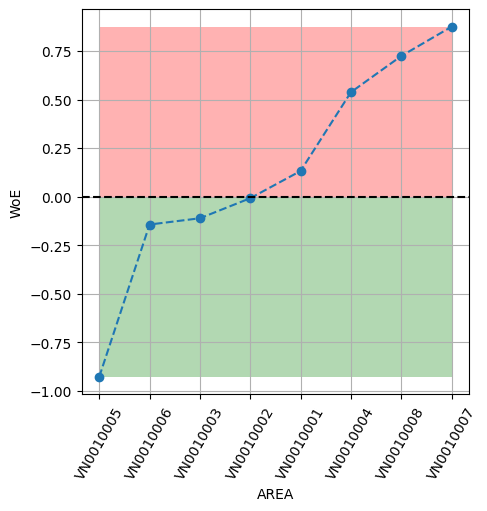

,PROFESSION,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"Kinh doanh tai san, dich vu tu van",221880,0.046796,0.210013,10383.5,211497.5,0.347536,0.206009,-0.522949,NaN,NaN,0.148794
1,"Cong nghiep che bien, san xuat",43726,0.026666,0.041387,1166.5,42560.5,0.039043,0.041456,0.059974,0.020130,0.582924,0.148794
2,"HDong Dang, Doan The va Hiep Hoi",463945,0.026236,0.439132,12172.5,451773.5,0.407414,0.440049,0.077057,0.000430,0.017083,0.148794
3,Unknown,207930,0.022402,0.196809,4658.5,203272.5,0.155920,0.197997,0.238910,0.003834,0.161852,0.148794
4,Cong nghiep khai thac,1109,0.019838,0.001050,22.5,1087.5,0.000753,0.001059,0.341177,0.002564,0.102268,0.148794
5,"Giao duc, dao tao",31011,0.016285,0.029352,505.5,30506.5,0.016919,0.029715,0.563203,0.003553,0.222026,0.148794
6,"Nong, lam nghiep",40700,0.014423,0.038523,587.5,40113.5,0.019664,0.039072,0.686648,0.001862,0.123445,0.148794
7,"Van hoa, the thao",333,0.012012,0.000315,4.5,329.5,0.000151,0.000321,0.756555,0.002411,0.069907,0.148794
8,Xay dung,1068,0.011236,0.001011,12.5,1056.5,0.000418,0.001029,0.900044,0.000776,0.143489,0.148794
9,"Van tai kho bai, thong tin lien lac",3580,0.010894,0.003389,39.5,3541.5,0.001322,0.003450,0.959061,0.000342,0.059017,0.148794


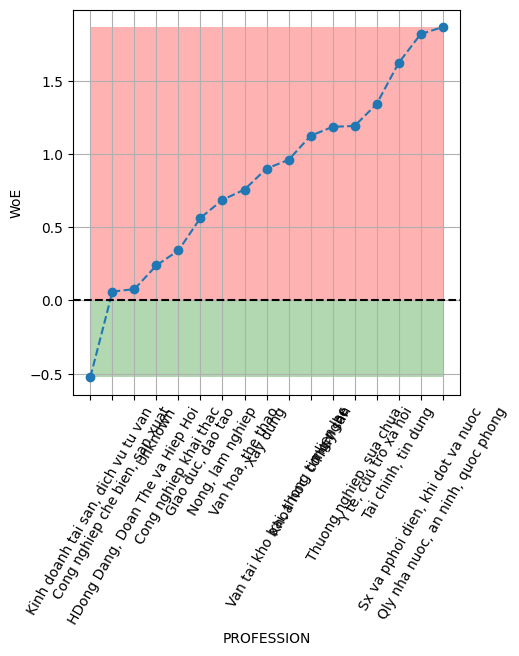

,GEN_GRP,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,Gen A,297,0.067340,0.000281,20.5,277.5,0.000686,0.000270,-0.931743,NaN,NaN,0.020118
1,Gen Z,295485,0.034388,0.279682,10161.5,285324.5,0.340174,0.277921,-0.202118,0.032953,0.729625,0.020118
2,Gen Y,533864,0.026544,0.505312,14171.5,519693.5,0.474415,0.506209,0.064867,0.007843,0.266985,0.020118
3,Gen X,169374,0.024862,0.160316,4211.5,165163.5,0.140987,0.160878,0.131978,0.001682,0.067111,0.020118
4,Trước Gen X,57484,0.022719,0.054410,1306.5,56178.5,0.043737,0.054721,0.224043,0.002143,0.092065,0.020118


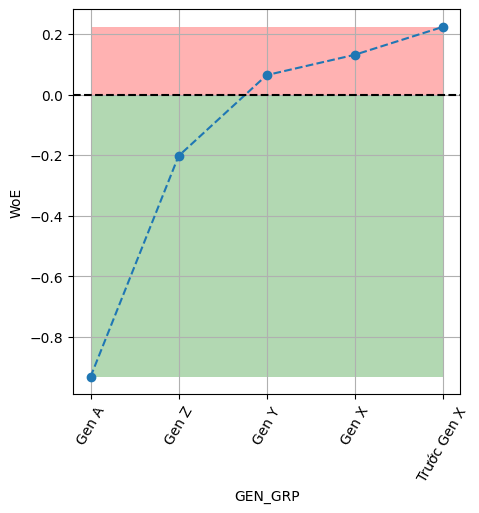

In [22]:
for c in X.select_dtypes(object).columns:
    try:
        tmp_df = woe_cat(X, c, y)
        plot_by_woe(tmp_df)
    except:
        plt.show()
        pass

Guideline for WoE continous variable:

Event and non-event is reactive and no-reactive

WoE > 0: distribution of no-reactive > distribution of reactive
WoE < 0: distribution of no-reactive < distribution of reactive

In [23]:
def woe_continous(df, cat_feat, event_df):
    label = event_df.name
    df = pd.concat([df[cat_feat], event_df], axis=1)
    df = pd.concat([
        df.groupby(cat_feat, as_index=False)[label].count(), 
        df.groupby(cat_feat, as_index=False)[label].mean()
        ], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_event']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_event'] = df['prop_event'] * df['n_obs'] + 0.5
    df['n_non_event'] = (1 - df['prop_event']) * df['n_obs'] + 0.5
    df['prop_n_event'] = df['n_event'] / df['n_event'].sum()
    df['prop_n_non_event'] = df['n_non_event'] / df['n_non_event'].sum()
    df['woe'] = np.log(df['prop_n_non_event'] / df['prop_n_event'])
    # df = df.sort_values(['woe'])
    # df = df.reset_index(drop=True)
    df['diff_prop_event'] = df['prop_event'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    df['iv'] = (df['prop_n_non_event'] - df['prop_n_event']) * df['woe']
    df['iv'] = df['iv'].sum()
    return df

In [24]:
y = mob1['REACTIVATED_CASA']
X = preprocess_data.copy()

In [25]:
valid_cols

['AREA',
 'PROFESSION',
 'GEN_GRP',
 'AGE',
 'LOR',
 'CREDIT_SCORE',
 'CASA_BAL_SUM_36M',
 'CASA_TXN_AMT_SUM_36M',
 'CASA_BAL_SUM_LATEST',
 'LOAN_SUM_LATEST']

## AGE

<Axes: xlabel='AGE', ylabel='Count'>

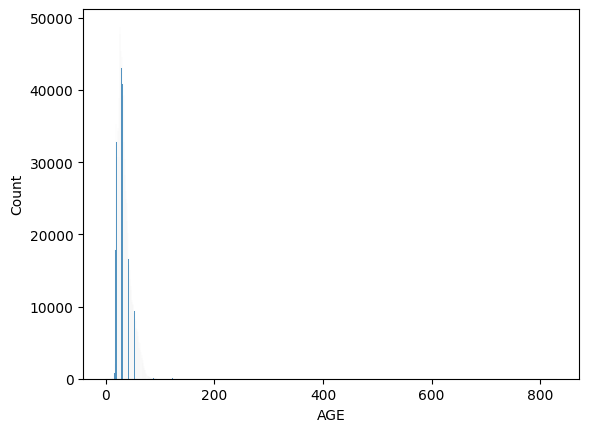

In [26]:
sns.histplot(X['AGE'])

In [27]:
X['AGE'] = X['AGE'].apply(lambda x: 80 if x > 80 else x)

,AGE_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(-0.08, 8.0]",261,0.057471,0.000247,15.5,246.5,0.000519,0.000240,-0.770536,NaN,NaN,0.040682
1,"(8.0, 16.0]",1392,0.200431,0.001318,279.5,1113.5,0.009356,0.001085,-2.154797,0.142960,1.384261,0.040682
2,"(16.0, 24.0]",218430,0.035902,0.206748,7842.5,210588.5,0.262519,0.205124,-0.246710,0.164529,1.908087,0.040682
3,"(24.0, 32.0]",348392,0.026470,0.329759,9222.5,339170.5,0.308713,0.330369,0.067799,0.009431,0.314508,0.040682
4,"(32.0, 40.0]",227891,0.026908,0.215703,6132.5,221759.5,0.205279,0.216005,0.050933,0.000437,0.016866,0.040682
5,"(40.0, 48.0]",117509,0.025164,0.111224,2957.5,114552.5,0.098999,0.111580,0.119631,0.001744,0.068698,0.040682
6,"(48.0, 56.0]",72886,0.025080,0.068988,1828.5,71058.5,0.061207,0.069215,0.122949,0.000084,0.003319,0.040682
7,"(56.0, 64.0]",44364,0.022563,0.041991,1001.5,43363.5,0.033524,0.042238,0.231061,0.002517,0.108112,0.040682
8,"(64.0, 72.0]",19047,0.020213,0.018028,385.5,18662.5,0.012904,0.018178,0.342672,0.002350,0.111611,0.040682
9,"(72.0, 80.0]",6332,0.032849,0.005993,208.5,6124.5,0.006979,0.005966,-0.156945,0.012636,0.499617,0.040682


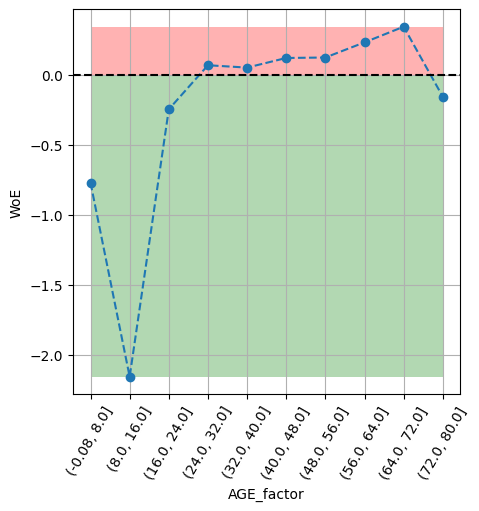

In [28]:
X['AGE_factor'] = pd.cut(X['AGE'],10)
plot_by_woe(woe_continous(X, 'AGE_factor', y))

## LOR

<Axes: xlabel='LOR', ylabel='Count'>

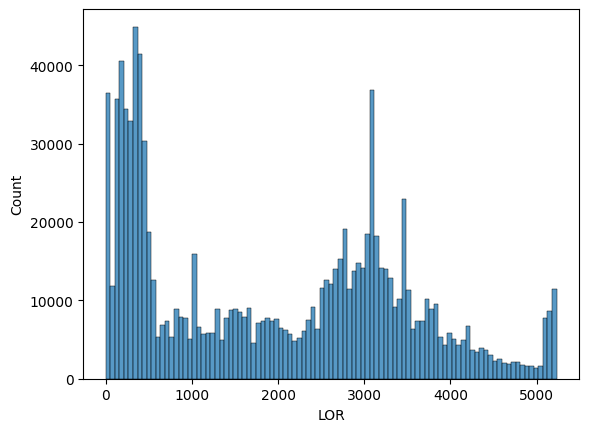

In [29]:
sns.histplot(X['LOR'])

,LOR_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(0.501, 50.9]",34777,0.305576,0.032917,10627.5,24150.5,0.355744,0.023524,-2.716198,NaN,NaN,1.076156
1,"(50.9, 100.8]",12838,0.047749,0.012151,613.5,12225.5,0.020536,0.011908,-0.544959,0.257827,2.171239,1.076156
2,"(100.8, 150.7]",29103,0.016837,0.027547,490.5,28613.5,0.016419,0.027871,0.529151,0.030912,1.074110,1.076156
3,"(150.7, 200.6]",40067,0.010158,0.037924,407.5,39660.5,0.013641,0.038631,1.041012,0.006679,0.511861,1.076156
4,"(200.6, 250.5]",32582,0.012891,0.030839,420.5,32162.5,0.014076,0.031328,0.800054,0.002733,0.240958,1.076156
5,"(250.5, 300.4]",32371,0.013870,0.030640,449.5,31922.5,0.015047,0.031094,0.725872,0.000980,0.074181,1.076156
6,"(300.4, 350.3]",34066,0.022486,0.032244,766.5,33300.5,0.025658,0.032436,0.234435,0.008615,0.491438,1.076156
7,"(350.3, 400.2]",43709,0.021483,0.041371,939.5,42770.5,0.031449,0.041661,0.281198,0.001003,0.046763,1.076156
8,"(400.2, 450.1]",33032,0.026701,0.031265,882.5,32150.5,0.029541,0.031316,0.058366,0.005218,0.222832,1.076156
9,"(450.1, 500.0]",763959,0.018687,0.723101,14276.5,749683.5,0.477890,0.730230,0.423978,0.008015,0.365612,1.076156


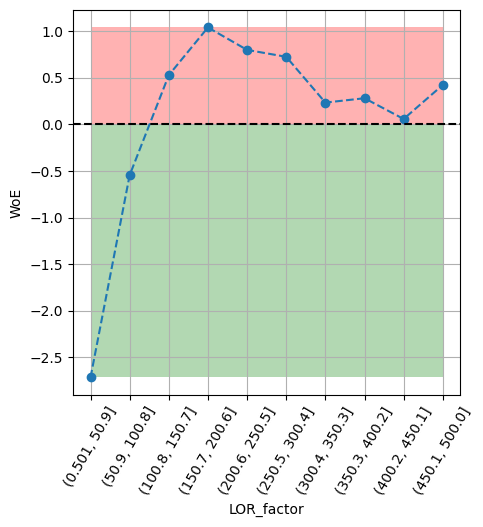

In [30]:
X['LOR_factor'] = X['LOR'].apply(lambda x: x if x < 500 else 500)
X['LOR_factor'] = pd.cut(X['LOR_factor'],10)
plot_by_woe(woe_continous(X, 'LOR_factor', y))

## CREDIT SCORE

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

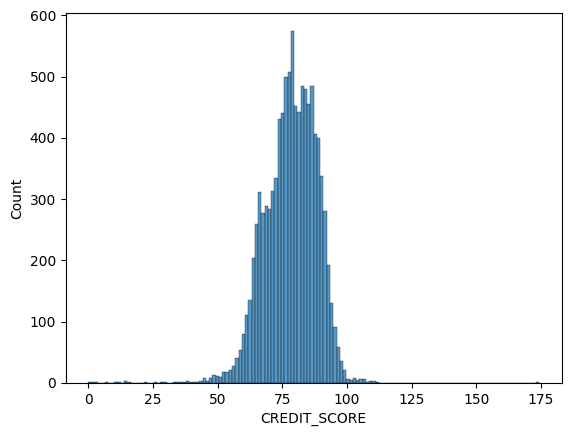

In [31]:
sns.histplot(X['CREDIT_SCORE'])

,CREDIT_SCORE_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(-0.174, 17.428]",9,0.000000,0.000891,0.5,9.5,0.001761,0.000967,-0.598763,NaN,NaN,0.155351
1,"(17.428, 34.856]",5,0.000000,0.000495,0.5,5.5,0.001761,0.000560,-1.145307,0.000000,0.546544,0.155351
2,"(34.856, 52.284]",66,0.000000,0.006537,0.5,66.5,0.001761,0.006772,1.347147,0.000000,2.492454,0.155351
3,"(52.284, 69.712]",1898,0.012118,0.187995,23.5,1875.5,0.082746,0.190988,0.836428,0.012118,0.510719,0.155351
4,"(69.712, 87.14]",6127,0.027909,0.606874,171.5,5956.5,0.603873,0.606568,0.004453,0.015791,0.831975,0.155351
5,"(87.14, 104.568]",1970,0.043147,0.195127,85.5,1885.5,0.301056,0.192006,-0.449770,0.015238,0.454223,0.155351
6,"(104.568, 121.996]",20,0.050000,0.001981,1.5,19.5,0.005282,0.001986,-0.978253,0.006853,0.528483,0.155351
7,"(121.996, 139.424]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155351
8,"(139.424, 156.852]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155351
9,"(156.852, 174.28]",1,0.000000,0.000099,0.5,1.5,0.001761,0.000153,-2.444590,NaN,NaN,0.155351


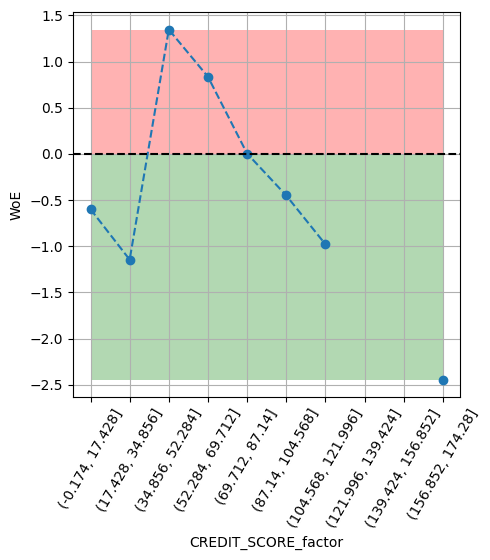

In [32]:
# X['CREDIT_SCORE_factor'] = X['CREDIT_SCORE'].apply(lambda x: 52 if x <= 61 else x)
# X['CREDIT_SCORE_factor'] = pd.cut(X['CREDIT_SCORE_factor'],10)
X['CREDIT_SCORE_factor'] = pd.cut(X['CREDIT_SCORE'],10)
plot_by_woe(woe_continous(X, 'CREDIT_SCORE_factor', y))

In [33]:
#  CASA_TXN_AMT_SUM_12M
#  CASA_TXN_AMT_SUM_24M
#  CASA_TXN_AMT_SUM_36M
#  CASA_TXN_CT_12M
#  CASA_ACCT_CT_36M
#  CASA_ACCT_ACTIVE_CT_12M

In [34]:
X['CASA_BAL_SUM_36M'].describe()

count    4.204620e+05
mean     4.800834e+06
std      1.767781e+08
min      0.000000e+00
25%      2.650000e+04
50%      5.522600e+04
75%      8.480000e+04
max      6.339391e+10
Name: CASA_BAL_SUM_36M, dtype: float64

<Axes: xlabel='CASA_BAL_SUM_36M', ylabel='Count'>

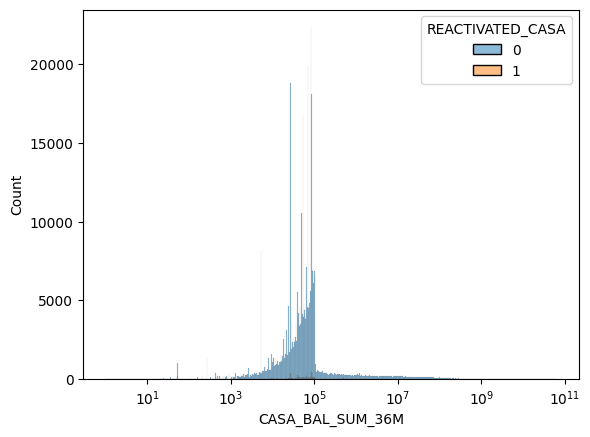

In [35]:
sns.histplot(X, x='CASA_BAL_SUM_36M', log_scale=True, hue=y)

,CASA_BAL_SUM_36M_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(7.983, 8.844]",37946,0.032019,0.090248,1215.5,36731.5,0.124284,0.089436,-0.329049,NaN,NaN,0.016647
1,"(8.844, 9.687]",26089,0.024761,0.062048,646.5,25443.5,0.066104,0.061951,-0.064886,0.007258,0.264163,0.016647
2,"(9.687, 10.531]",76296,0.021286,0.181458,1624.5,74672.5,0.166104,0.181817,0.090383,0.003476,0.155269,0.016647
3,"(10.531, 11.375]",188113,0.022104,0.447396,4158.5,183955.5,0.425204,0.447905,0.052011,0.000818,0.038372,0.016647
4,"(11.375, 12.218]",47711,0.022825,0.113473,1089.5,46622.5,0.111401,0.113519,0.018836,0.000721,0.033175,0.016647
5,"(12.218, 13.062]",8696,0.021159,0.020682,184.5,8512.5,0.018865,0.020727,0.094113,0.001666,0.075277,0.016647
6,"(13.062, 13.905]",7317,0.029247,0.017402,214.5,7103.5,0.021933,0.017296,-0.237495,0.008088,0.331608,0.016647
7,"(13.905, 14.749]",6312,0.021388,0.015012,135.5,6177.5,0.013855,0.015041,0.082169,0.007859,0.319664,0.016647
8,"(14.749, 15.593]",5204,0.022098,0.012377,115.5,5089.5,0.011810,0.012392,0.048136,0.000711,0.034033,0.016647
9,"(15.593, 16.436]",5059,0.023522,0.012032,119.5,4940.5,0.012219,0.012029,-0.015623,0.001424,0.063759,0.016647


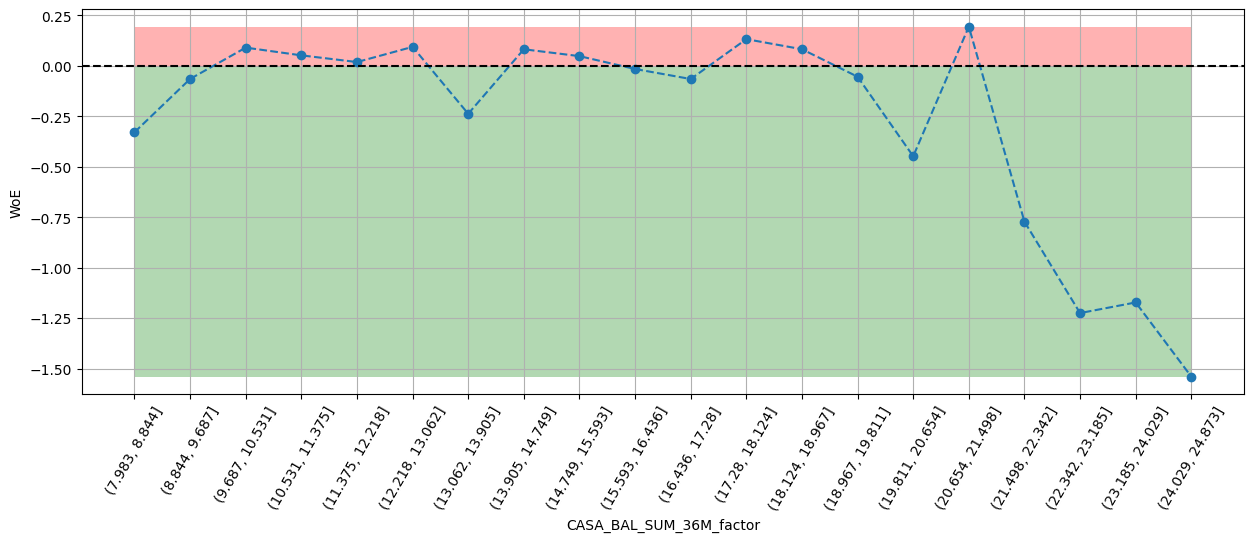

In [36]:
X['CASA_BAL_SUM_36M_factor'] = np.log(X['CASA_BAL_SUM_36M']+1)
X['CASA_BAL_SUM_36M_factor'] = X['CASA_BAL_SUM_36M_factor'].apply(lambda x: 8 if x <=8 else x)
X['CASA_BAL_SUM_36M_factor'] = pd.cut(X['CASA_BAL_SUM_36M_factor'], 20)
# X['CASA_BAL_SUM_36M_factor'] = pd.cut(np.log(X['CASA_BAL_SUM_36M']+1), 20)
plot_by_woe(woe_continous(X, 'CASA_BAL_SUM_36M_factor', y), figsize=(15, 5))

In [37]:
X.columns

Index(['AREA', 'PROFESSION', 'GEN_GRP', 'AGE', 'LOR', 'CREDIT_SCORE',
       'CASA_BAL_SUM_36M', 'CASA_TXN_AMT_SUM_36M', 'CASA_BAL_SUM_LATEST',
       'LOAN_SUM_LATEST', 'AREA:VN0010001', 'AREA:VN0010002', 'AREA:VN0010003',
       'AREA:VN0010004', 'AREA:VN0010005', 'AREA:VN0010006', 'AREA:VN0010007',
       'AREA:VN0010008', 'PROFESSION:Cong nghiep che bien, san xuat',
       'PROFESSION:Cong nghiep khai thac', 'PROFESSION:Giao duc, dao tao',
       'PROFESSION:HDong Dang, Doan The va Hiep Hoi',
       'PROFESSION:Khoa hoc, cong nghe',
       'PROFESSION:Kinh doanh tai san, dich vu tu van',
       'PROFESSION:Nong, lam nghiep',
       'PROFESSION:Qly nha nuoc, an ninh, quoc phong',
       'PROFESSION:Sx va pphoi dien, khi dot va nuoc',
       'PROFESSION:Tai chinh, tin dung', 'PROFESSION:Thuong nghiep, sua chua',
       'PROFESSION:Thuy san', 'PROFESSION:Unknown',
       'PROFESSION:Van hoa, the thao',
       'PROFESSION:Van tai kho bai, thong tin lien lac', 'PROFESSION:Xay dung',
   

In [38]:
# sns.histplot(X['CASA_BAL_SUM_LATEST'])

,CASA_BAL_SUM_LATEST_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(-0.0253, 2.526]",7813,0.038782,0.019026,303.5,7510.5,0.031767,0.018724,-0.528593,NaN,NaN,0.0145
1,"(2.526, 5.052]",37151,0.028559,0.090469,1061.5,36090.5,0.111105,0.089977,-0.210922,0.010222,0.317671,0.0145
2,"(5.052, 7.578]",356713,0.022430,0.868652,8001.5,348712.5,0.837503,0.869375,0.037350,0.006129,0.248272,0.0145
3,"(7.578, 10.104]",4541,0.019599,0.011058,89.5,4452.5,0.009368,0.011101,0.169714,0.002831,0.132364,0.0145
4,"(10.104, 12.63]",876,0.012557,0.002133,11.5,865.5,0.001204,0.002158,0.583692,0.007042,0.413978,0.0145
5,"(12.63, 15.156]",544,0.012868,0.001325,7.5,537.5,0.000785,0.001340,0.534757,0.000311,0.048935,0.0145
6,"(15.156, 17.682]",459,0.043573,0.001118,20.5,439.5,0.002146,0.001096,-0.672055,0.030705,1.206813,0.0145
7,"(17.682, 20.208]",2114,0.021287,0.005148,45.5,2069.5,0.004762,0.005159,0.080082,0.022286,0.752137,0.0145
8,"(20.208, 22.734]",428,0.028037,0.001042,12.5,416.5,0.001308,0.001038,-0.231110,0.006751,0.311192,0.0145
9,"(22.734, 25.26]",12,0.000000,0.000029,0.5,12.5,0.000052,0.000031,-0.518392,0.028037,0.287282,0.0145


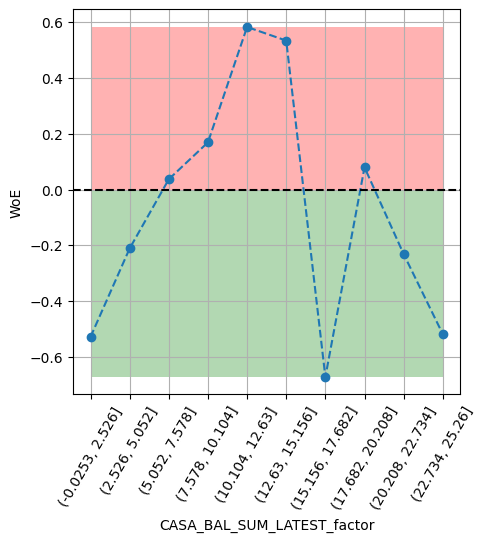

In [39]:
X['CASA_BAL_SUM_LATEST_factor'] = np.log(X['CASA_BAL_SUM_LATEST']+1)
# X['CASA_BAL_SUM_LATEST_factor'] = X['CASA_BAL_SUM_LATEST_factor'].apply(lambda x: 8 if x <=8 else x)
X['CASA_BAL_SUM_LATEST_factor'] = pd.cut(X['CASA_BAL_SUM_LATEST_factor'],10)
# X['CASA_BAL_SUM_LATEST_factor'] = pd.cut(X['CASA_BAL_SUM_LATEST'],4)
plot_by_woe(woe_continous(X, 'CASA_BAL_SUM_LATEST_factor', y))

In [40]:
# sns.histplot(X['CASA_ACCT_ACTIVE_CT_12M'])

In [41]:
X['LOAN_SUM_LATEST'].describe()

count    5.310000e+02
mean     2.695376e+08
std      9.143311e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.249700e+07
75%      1.300000e+08
max      1.500000e+10
Name: LOAN_SUM_LATEST, dtype: float64

,LOAN_SUM_LATEST_factor,n_obs,prop_event,prop_n_obs,n_event,n_non_event,prop_n_event,prop_n_non_event,woe,diff_prop_event,diff_woe,iv
0,"(9.987, 11.343]",238,0.012605,0.448211,3.5,235.5,0.184211,0.451149,0.895719,NaN,NaN,0.867419
1,"(11.343, 12.686]",1,1.000000,0.001883,1.5,0.5,0.078947,0.000958,-4.411841,0.987395,5.307560,0.867419
2,"(12.686, 14.029]",3,0.000000,0.005650,0.5,3.5,0.026316,0.006705,-1.367318,1.000000,3.044522,0.867419
3,"(14.029, 15.373]",6,0.000000,0.011299,0.5,6.5,0.026316,0.012452,-0.748279,0.000000,0.619039,0.867419
4,"(15.373, 16.716]",26,0.038462,0.048964,1.5,25.5,0.078947,0.048851,-0.480015,0.038462,0.268264,0.867419
5,"(16.716, 18.059]",70,0.014286,0.131827,1.5,69.5,0.078947,0.133142,0.522633,0.024176,1.002648,0.867419
6,"(18.059, 19.402]",97,0.030928,0.182674,3.5,94.5,0.184211,0.181034,-0.017392,0.016642,0.540025,0.867419
7,"(19.402, 20.745]",51,0.058824,0.096045,3.5,48.5,0.184211,0.092912,-0.684428,0.027896,0.667036,0.867419
8,"(20.745, 22.088]",33,0.030303,0.062147,1.5,32.5,0.078947,0.062261,-0.237454,0.028520,0.446974,0.867419
9,"(22.088, 23.431]",6,0.166667,0.011299,1.5,5.5,0.078947,0.010536,-2.013946,0.136364,1.776492,0.867419


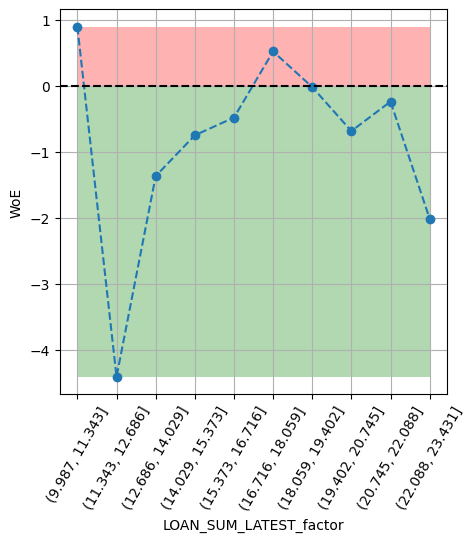

In [42]:
X['LOAN_SUM_LATEST_factor'] = np.log(X['LOAN_SUM_LATEST']+1)
X['LOAN_SUM_LATEST_factor'] = X['LOAN_SUM_LATEST_factor'].apply(lambda x: 10 if x <=10 else x)
X['LOAN_SUM_LATEST_factor'] = pd.cut(X['LOAN_SUM_LATEST_factor'],10)
# X['LOAN_SUM_LATEST_factor'] = pd.cut(X['LOAN_SUM_LATEST'],2)
plot_by_woe(woe_continous(X, 'LOAN_SUM_LATEST_factor', y))

# New Feature base on WoE

In [45]:
preprocess_data.head()

,AREA,PROFESSION,GEN_GRP,AGE,LOR,CREDIT_SCORE,CASA_BAL_SUM_36M,CASA_TXN_AMT_SUM_36M,CASA_BAL_SUM_LATEST,LOAN_SUM_LATEST,...,PROFESSION:Unknown,"PROFESSION:Van hoa, the thao","PROFESSION:Van tai kho bai, thong tin lien lac",PROFESSION:Xay dung,"PROFESSION:Y te, cuu tro xa hoi",GEN_GRP:Gen A,GEN_GRP:Gen X,GEN_GRP:Gen Y,GEN_GRP:Gen Z,GEN_GRP:Trước Gen X
CUSTOMER_CDE,,,,,,,,,,,,,,,,,,,,,
17085001,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,24.0,422.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
17207565,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,19.0,390.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
17471422,VN0010007,"Giao duc, dao tao",Gen Z,18.0,328.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
17553800,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen X,43.0,302.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
17738041,VN0010001,"Kinh doanh tai san, dich vu tu van",Gen Z,20.0,236.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [46]:
preprocess_data.columns

Index(['AREA', 'PROFESSION', 'GEN_GRP', 'AGE', 'LOR', 'CREDIT_SCORE',
       'CASA_BAL_SUM_36M', 'CASA_TXN_AMT_SUM_36M', 'CASA_BAL_SUM_LATEST',
       'LOAN_SUM_LATEST', 'AREA:VN0010001', 'AREA:VN0010002', 'AREA:VN0010003',
       'AREA:VN0010004', 'AREA:VN0010005', 'AREA:VN0010006', 'AREA:VN0010007',
       'AREA:VN0010008', 'PROFESSION:Cong nghiep che bien, san xuat',
       'PROFESSION:Cong nghiep khai thac', 'PROFESSION:Giao duc, dao tao',
       'PROFESSION:HDong Dang, Doan The va Hiep Hoi',
       'PROFESSION:Khoa hoc, cong nghe',
       'PROFESSION:Kinh doanh tai san, dich vu tu van',
       'PROFESSION:Nong, lam nghiep',
       'PROFESSION:Qly nha nuoc, an ninh, quoc phong',
       'PROFESSION:Sx va pphoi dien, khi dot va nuoc',
       'PROFESSION:Tai chinh, tin dung', 'PROFESSION:Thuong nghiep, sua chua',
       'PROFESSION:Thuy san', 'PROFESSION:Unknown',
       'PROFESSION:Van hoa, the thao',
       'PROFESSION:Van tai kho bai, thong tin lien lac', 'PROFESSION:Xay dung',
   

In [48]:
woe_df[woe_df['variable']=='PROFESSION'].sort_values(by='woe')

,variable,cutoff,n,num_event,perc_event,num_non_event,perc_non_event,woe,iv
5,PROFESSION,"Kinh doanh tai san, dich vu tu van",221880,10383,0.347618,211497,0.206010,-0.523180,0.074086
0,PROFESSION,"Cong nghiep che bien, san xuat",43726,1166,0.039037,42560,0.041456,0.060115,0.000145
3,PROFESSION,"HDong Dang, Doan The va Hiep Hoi",463945,12172,0.407513,451773,0.440052,0.076821,0.002500
12,PROFESSION,Unknown,207930,4658,0.155948,203272,0.197998,0.238738,0.010039
1,PROFESSION,Cong nghiep khai thac,1109,22,0.000737,1087,0.001059,0.362914,0.000117
2,PROFESSION,"Giao duc, dao tao",31011,505,0.016907,30506,0.029715,0.563900,0.007222
6,PROFESSION,"Nong, lam nghiep",40700,587,0.019652,40113,0.039072,0.687210,0.013346
13,PROFESSION,"Van hoa, the thao",333,4,0.000134,329,0.000320,0.872543,0.000163
15,PROFESSION,Xay dung,1068,12,0.000402,1056,0.001029,0.940116,0.000589
14,PROFESSION,"Van tai kho bai, thong tin lien lac",3580,39,0.001306,3541,0.003449,0.971382,0.002082


In [51]:
new_df = preprocess_data.loc[:, ['AREA:VN0010001', 'AREA:VN0010002', 'AREA:VN0010005','AREA:VN0010004', 'AREA:VN0010007',]]
new_df['AREA:VN001000_6_3'] = sum([
    preprocess_data['AREA:VN0010003'], 
    preprocess_data['AREA:VN0010006']
])

new_df['PROFESSION:Kinh doanh tai san, dich vu tu van'] = preprocess_data.loc[:, 'PROFESSION:Kinh doanh tai san, dich vu tu van']
new_df['PROFESSION:Cong nghiep_Hiep hoi'] = sum([
    preprocess_data.loc[:, 'PROFESSION:Cong nghiep che bien, san xuat'],
    preprocess_data.loc[:, 'PROFESSION:HDong Dang, Doan The va Hiep Hoi']
])
new_df['PROFESSION:Unknown'] = preprocess_data.loc[:, 'PROFESSION:Unknown']
new_df['PROFESSION:Cong nghiep khai thac'] = preprocess_data.loc[:, 'PROFESSION:Cong nghiep khai thac']
new_df['PROFESSION:Giao duc_Nong lam nghiep'] = sum([
    preprocess_data.loc[:, 'PROFESSION:Giao duc, dao tao'],
    preprocess_data.loc[:, 'PROFESSION:Nong, lam nghiep']
])
new_df['PROFESSION:Vanhoa_Xaydung_Vantai'] = sum([
    preprocess_data.loc[:, 'PROFESSION:Van hoa, the thao'],
    preprocess_data.loc[:, 'PROFESSION:Xay dung'],
    preprocess_data.loc[:, 'PROFESSION:Van tai kho bai, thong tin lien lac']
])
new_df['PROFESSION:Thuonnghiep_Thuysan_Yte'] = sum([
    preprocess_data.loc[:, 'PROFESSION:Thuong nghiep, sua chua'],
    preprocess_data.loc[:, 'PROFESSION:Thuy san'],
    preprocess_data.loc[:, 'PROFESSION:Y te, cuu tro xa hoi']
])
new_df['PROFESSION:Khoahoc_Taichinh'] = sum([
    preprocess_data.loc[:, 'PROFESSION:Khoa hoc, cong nghe'],
    preprocess_data.loc[:, 'PROFESSION:Tai chinh, tin dung']
])
new_df['PROFESSION:Nhanuoc_Pphoidien'] = sum([
    preprocess_data.loc[:, 'PROFESSION:Qly nha nuoc, an ninh, quoc phong'],
    preprocess_data.loc[:, 'PROFESSION:Sx va pphoi dien, khi dot va nuoc']
])

new_df['GEN_GRP:Gen A'] = preprocess_data.loc[:, 'GEN_GRP:Gen A']
new_df['GEN_GRP:Gen X'] = preprocess_data.loc[:, 'GEN_GRP:Gen X']
new_df['GEN_GRP:Gen Y'] = preprocess_data.loc[:, 'GEN_GRP:Gen Y']
new_df['GEN_GRP:Gen Z'] = preprocess_data.loc[:, 'GEN_GRP:Gen Z']
new_df['GEN_GRP:Trước Gen X'] = preprocess_data.loc[:, 'GEN_GRP:Trước Gen X']

In [52]:
new_df['AGE:<25'] = np.where((preprocess_data['AGE']<25), 1, 0)
new_df['AGE:25-49'] = np.where((preprocess_data['AGE']>=25) & (preprocess_data['AGE']<49), 1, 0)
new_df['AGE:25-57'] = np.where((preprocess_data['AGE']>=25) & (preprocess_data['AGE']<57), 1, 0)
new_df['AGE:57-65'] = np.where((preprocess_data['AGE']>=57) & (preprocess_data['AGE']<65), 1, 0)
new_df['AGE:>65'] = np.where((preprocess_data['AGE']>=65), 1, 0)

In [53]:
new_df['LOR:<51'] = np.where((preprocess_data['LOR']<51), 1, 0)
new_df['LOR:51-101'] = np.where((preprocess_data['LOR']>=51) & (preprocess_data['LOR']<101), 1, 0)
new_df['LOR:101-151'] = np.where((preprocess_data['LOR']>=101) & (preprocess_data['LOR']<151), 1, 0)
new_df['LOR:151-201'] = np.where((preprocess_data['LOR']>=151) & (preprocess_data['LOR']<201), 1, 0)
new_df['LOR:201-301'] = np.where((preprocess_data['LOR']>=201) & (preprocess_data['LOR']<301), 1, 0)
new_df['LOR:>301'] = np.where((preprocess_data['LOR']>=301), 1, 0)

new_df['CREDIT_SCORE:<35'] = np.where((preprocess_data['CREDIT_SCORE']<35), 1, 0)
new_df['CREDIT_SCORE:35-53'] = np.where((preprocess_data['CREDIT_SCORE']>=35) & (preprocess_data['CREDIT_SCORE']<53), 1, 0)
new_df['CREDIT_SCORE:53-70'] = np.where((preprocess_data['CREDIT_SCORE']>=53) & (preprocess_data['CREDIT_SCORE']<70), 1, 0)
new_df['CREDIT_SCORE:>70'] = np.where((preprocess_data['CREDIT_SCORE']>=70), 1, 0)

In [54]:
new_df['CASA_BAL_SUM_36M:<22'] = np.where((np.log(preprocess_data['CASA_BAL_SUM_36M'] + 1) < 22), 1, 0)
new_df['CASA_BAL_SUM_36M:>22'] = np.where((np.log(preprocess_data['CASA_BAL_SUM_36M'] + 1) >=70), 1, 0)

In [55]:
new_df['CASA_BAL_SUM_LATEST:<2.5'] = np.where((np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) < 2.5), 1, 0)
new_df['CASA_BAL_SUM_LATEST:2.5_5'] = np.where((np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) >=2.5) & (np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) <5), 1, 0)
new_df['CASA_BAL_SUM_LATEST:5_7.5'] = np.where((np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) >=5) & (np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) <7.5), 1, 0)
new_df['CASA_BAL_SUM_LATEST:7.5_10'] = np.where((np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) >=7.5) & (np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) <10), 1, 0)
new_df['CASA_BAL_SUM_LATEST:10_15'] = np.where((np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) >=10) & (np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) <15), 1, 0)
new_df['CASA_BAL_SUM_LATEST:15_17.5'] = np.where((np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) >=15) & (np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) <17.5), 1, 0)
new_df['CASA_BAL_SUM_LATEST:>17.5'] = np.where((np.log(preprocess_data['CASA_BAL_SUM_LATEST'] + 1) >= 17.5), 1, 0)

In [56]:
new_df1 = new_df.copy()

In [57]:
# dummy category to drop

ref_categories = [
    'AREA:VN0010002',
    'PROFESSION:Unknown', 
    'GEN_GRP:Trước Gen X',
    'AGE:<25',
    'LOR:<51',
    'CREDIT_SCORE:<35',
    'CASA_BAL_SUM_36M:<22',
    'CASA_BAL_SUM_LATEST:<2.5',
]
new_df.drop(columns=ref_categories, inplace=True, axis=1)

In [58]:
new_df['REACTIVATED_CASA'] = y

# Split train/test

In [59]:
X = new_df.drop(columns=['REACTIVATED_CASA'], axis=1)
y = new_df['REACTIVATED_CASA']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [61]:
y_train.value_counts()

0    718551
1     21001
Name: REACTIVATED_CASA, dtype: int64

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = model.predict(X_test)

In [64]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    308084
           1       0.50      0.09      0.16      8868

    accuracy                           0.97    316952
   macro avg       0.74      0.55      0.57    316952
weighted avg       0.96      0.97      0.96    316952



In [65]:
y_prob = model.predict_proba(X_test)

Text(0.5, 1.0, 'AUC ROC Curve')

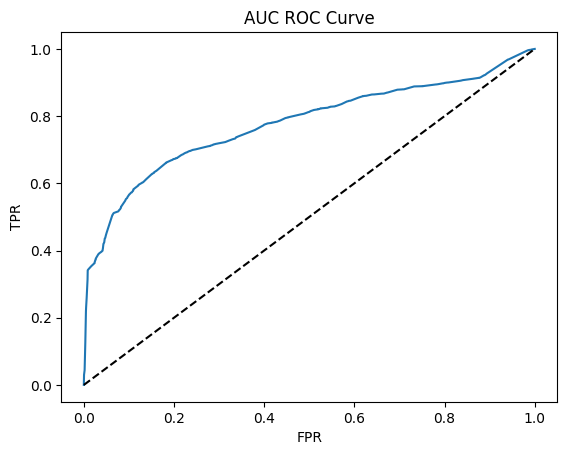

In [68]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC Curve')

In [71]:
aucroc = metrics.roc_auc_score(y_test, y_prob[:, 1])
gini = 2 * aucroc - 1
aucroc, gini

(0.7759276984686947, 0.5518553969373894)